# Sprint 9. Análisis de sentimiento y textos

## Tarea M9 T01

### Ejercicio 1: Coge un texto en inglés que quieras, y calcula la frecuencia de sus palabras.

In [27]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import spacy
from spacy.language import Language
from spacy import displacy
import nltk
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist
from nltk.stem import SnowballStemmer
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud


#### Selecionamos el texto y lo asiganamos a una variable

He elegido utilizar la transcripción completa del discurso de Chimamanda Ngozi Adichie, "The Danger of a Single Story" (El peligro de una sola historia), pronunciado en TEDGlobal en julio de 2009. Este discurso explora el impacto y las limitaciones de las narrativas únicas en la literatura y en la vida cotidiana. Adichie utiliza sus experiencias personales y observaciones culturales para ilustrar sus argumentos, ofreciendo un relato detallado sobre la importancia de contar con historias diversas para comprender y respetar las diferentes culturas e individuos.

El texto fue tomado de: https://jamesclear.com/great-speeches/the-danger-of-a-single-story-by-chimamanda-ngozi-adichie

In [28]:
Chimamanda_Ngozi = """
I’m a storyteller. And I would like to tell you a few personal stories about what I like to call “the danger of the single story.”I grew up on a university campus in eastern Nigeria. My mother says that I started reading at the age of two, although I think four is probably close to the truth. So I was an early reader, and what I read were British and American children’s books.
I was also an early writer, and when I began to write, at about the age of seven, stories in pencil with crayon illustrations that my poor mother was obligated to read, I wrote exactly the kinds of stories I was reading: All my characters were white and blue-eyed, they played in the snow, they ate apples, and they talked a lot about the weather, how lovely it was that the sun had come out.
Now, this despite the fact that I lived in Nigeria. I had never been outside Nigeria. We didn’t have snow, we ate mangoes, and we never talked about the weather, because there was no need to.My characters also drank a lot of ginger beer, because the characters in the British books I read drank ginger beer. Never mind that I had no idea what ginger beer was. And for many years afterwards, I would have a desperate desire to taste ginger beer. But that is another story.
What this demonstrates, I think, is how impressionable and vulnerable we are in the face of a story, particularly as children. Because all I had read were books in which characters were foreign, I had become convinced that books by their very nature had to have foreigners in them and had to be about things with which I could not personally identify.Now, things changed when I discovered African books. There weren’t many of them available, and they weren’t quite as easy to find as the foreign books. But because of writers like Chinua Achebe and Camara Laye, I went through a mental shift in my perception of literature. I realized that people like me, girls with skin the color of chocolate, whose kinky hair could not form ponytails, could also exist in literature. I started to write about things I recognized.
Now, I loved those American and British books I read. They stirred my imagination. They opened up new worlds for me. But the unintended consequence was that I did not know that people like me could exist in literature. So what the discovery of African writers did for me was this: It saved me from having a single story of what books are. I come from a conventional, middle-class Nigerian family. My father was a professor. My mother was an administrator. And so we had, as was the norm, live-in domestic help, who would often come from nearby rural villages. So, the year I turned eight, we got a new house boy. His name was Fide. The only thing my mother told us about him was that his family was very poor. My mother sent yams and rice, and our old clothes, to his family. And when I didn’t finish my dinner, my mother would say, “Finish your food! Don’t you know? People like Fide’s family have nothing.” So I felt enormous pity for Fide’s family.
Then one Saturday, we went to his village to visit, and his mother showed us a beautifully patterned basket made of dyed raffia that his brother had made. I was startled. It had not occurred to me that anybody in his family could actually make something. All I had heard about them was how poor they were, so that it had become impossible for me to see them as anything else but poor. Their poverty was my single story of them. Years later, I thought about this when I left Nigeria to go to university in the United States. I was 19. My American roommate was shocked by me. She asked where I had learned to speak English so well, and was confused when I said that Nigeria happened to have English as its official language. She asked if she could listen to what she called my “tribal music,” and was consequently very disappointed when I produced my tape of Mariah Carey. She assumed that I did not know how to use a stove.
What struck me was this: She had felt sorry for me even before she saw me. Her default position toward me, as an African, was a kind of patronizing, well-meaning pity. My roommate had a single story of Africa: a single story of catastrophe. In this single story, there was no possibility of Africans being similar to her in any way, no possibility of feelings more complex than pity, no possibility of a connection as human equals.
I must say that before I went to the U.S., I didn’t consciously identify as African. But in the U.S., whenever Africa came up, people turned to me. Never mind that I knew nothing about places like Namibia. But I did come to embrace this new identity, and in many ways I think of myself now as African. Although I still get quite irritable when Africa is referred to as a country, the most recent example being my otherwise wonderful flight from Lagos two days ago, in which there was an announcement on the Virgin flight about the charity work in “India, Africa and other countries.”
So, after I had spent some years in the U.S. as an African, I began to understand my roommate’s response to me. If I had not grown up in Nigeria, and if all I knew about Africa were from popular images, I too would think that Africa was a place of beautiful landscapes, beautiful animals, and incomprehensible people, fighting senseless wars, dying of poverty and AIDS, unable to speak for themselves and waiting to be saved by a kind, white foreigner. I would see Africans in the same way that I, as a child, had seen Fide’s family. This single story of Africa ultimately comes, I think, from Western literature. Now, here is a quote from the writing of a London merchant called John Lok, who sailed to West Africa in 1561 and kept a fascinating account of his voyage. After referring to the black Africans as “beasts who have no houses,” he writes, “They are also people without heads, having their mouth and eyes in their breasts.”
Now, I’ve laughed every time I’ve read this. And one must admire the imagination of John Lok. But what is important about his writing is that it represents the beginning of a tradition of telling African stories in the West: A tradition of Sub-Saharan Africa as a place of negatives, of difference, of darkness, of people who, in the words of the wonderful poet Rudyard Kipling, are “half devil, half child.” And so, I began to realize that my American roommate must have, throughout her life, seen and heard different versions of this single story, as had a professor, who once told me that my novel was not “authentically African.” Now, I was quite willing to contend that there were a number of things wrong with the novel, that it had failed in a number of places, but I had not quite imagined that it had failed at achieving something called African authenticity. In fact, I did not know what African authenticity was. 
The professor told me that my characters were too much like him, an educated and middle-class man. My characters drove cars. They were not starving. Therefore they were not authentically African.
But I must quickly add that I too am just as guilty in the question of the single story. A few years ago, I visited Mexico from the U.S. The political climate in the U.S. at the time was tense, and there were debates going on about immigration. And, as often happens in America, immigration became synonymous with Mexicans. There were endless stories of Mexicans as people who were fleecing the healthcare system, sneaking across the border, being arrested at the border, that sort of thing. I remember walking around on my first day in Guadalajara, watching the people going to work, rolling up tortillas in the marketplace, smoking, laughing. I remember first feeling slight surprise. And then, I was overwhelmed with shame. I realized that I had been so immersed in the media coverage of Mexicans that they had become one thing in my mind, the abject immigrant. I had bought into the single story of Mexicans and I could not have been more ashamed of myself.
So that is how to create a single story, show a people as one thing, as only one thing, over and over again, and that is what they become.It is impossible to talk about the single story without talking about power. There is a word, an Igbo word, that I think about whenever I think about the power structures of the world, and it is “nkali.” It’s a noun that loosely translates to “to be greater than another.” Like our economic and political worlds, stories too are defined by the principle of nkali: How they are told, who tells them, when they’re told, how many stories are told, are really dependent on power.
Power is the ability not just to tell the story of another person, but to make it the definitive story of that person. The Palestinian poet Mourid Barghouti writes that if you want to dispossess a people, the simplest way to do it is to tell their story and to start with, “secondly.” Start the story with the arrows of the Native Americans, and not with the arrival of the British, and you have an entirely different story. Start the story with the failure of the African state, and not with the colonial creation of the African state, and you have an entirely different story.I recently spoke at a university where a student told me that it was such a shame that Nigerian men were physical abusers like the father character in my novel. I told him that I had just read a novel called “American Psycho” and that it was such a shame that young Americans were serial murderers. Now, obviously, I said this in a fit of mild irritation.
But it would never have occurred to me to think that just because I had read a novel in which a character was a serial killer that he was somehow representative of all Americans. 
This is not because I am a better person than that student, but because of America’s cultural and economic power. I had many stories of America. I had read Tyler and Updike and Steinbeck and Gaitskill. I did not have a single story of America. When I learned, some years ago, that writers were expected to have had really unhappy childhoods to be successful, I began to think about how I could invent horrible things my parents had done to me. But the truth is that I had a very happy childhood, full of laughter and love, in a very close-knit family. But I also had grandfathers who died in refugee camps. My cousin Polle died because he could not get adequate healthcare. One of my closest friends, Okoloma, died in a plane crash because our fire trucks did not have water. I grew up under repressive military governments that devalued education, so that sometimes, my parents were not paid their salaries.
And so, as a child, I saw jam disappear from the breakfast table, then margarine disappeared, then bread became too expensive, then milk became rationed. And most of all, a kind of normalized political fear invaded our lives.
All of these stories make me who I am. But to insist on only these negative stories is to flatten my experience and to overlook the many other stories that formed me. The single story creates stereotypes, and the problem with stereotypes is not that they are untrue, but that they are incomplete. They make one story become the only story.
Of course, Africa is a continent full of catastrophes: There are immense ones, such as the horrific rapes in Congo and depressing ones, such as the fact that 5,000 people apply for one job vacancy in Nigeria. But there are other stories that are not about catastrophe, and it is very important, it is just as important, to talk about them.
I’ve always felt that it is impossible to engage properly with a place or a person without engaging with all of the stories of that place and that person. The consequence of the single story is this: It robs people of dignity. It makes our recognition of our equal humanity difficult. It emphasizes how we are different rather than how we are similar.
So what if before my Mexican trip, I had followed the immigration debate from both sides, the U.S. and the Mexican? What if my mother had told us that Fide’s family was poor and hardworking? What if we had an African television network that broadcast diverse African stories all over the world? What the Nigerian writer Chinua Achebe calls “a balance of stories.”
What if my roommate knew about my Nigerian publisher, Muhtar Bakare, a remarkable man who left his job in a bank to follow his dream and start a publishing house? Now, the conventional wisdom was that Nigerians don’t read literature. He disagreed. He felt that people who could read, would read, if you made literature affordable and available to them.
Shortly after he published my first novel, I went to a TV station in Lagos to do an interview, and a woman who worked there as a messenger came up to me and said, “I really liked your novel. I didn’t like the ending. Now, you must write a sequel, and this is what will happen…”
And she went on to tell me what to write in the sequel. I was not only charmed, I was very moved. Here was a woman, part of the ordinary masses of Nigerians, who were not supposed to be readers. She had not only read the book, but she had taken ownership of it and felt justified in telling me what to write in the sequel.
Now, what if my roommate knew about my friend Funmi Iyanda, a fearless woman who hosts a TV show in Lagos, and is determined to tell the stories that we prefer to forget? What if my roommate knew about the heart procedure that was performed in the Lagos hospital last week? What if my roommate knew about contemporary Nigerian music, talented people singing in English and Pidgin, and Igbo and Yoruba and Ijo, mixing influences from Jay-Z to Fela to Bob Marley to their grandfathers.
What if my roommate knew about the female lawyer who recently went to court in Nigeria to challenge a ridiculous law that required women to get their husband’s consent before renewing their passports? What if my roommate knew about Nollywood, full of innovative people making films despite great technical odds, films so popular that they really are the best example of Nigerians consuming what they produce? What if my roommate knew about my wonderfully ambitious hair braider, who has just started her own business selling hair extensions? Or about the millions of other Nigerians who start businesses and sometimes fail, but continue to nurse ambition?
Every time I am home I am confronted with the usual sources of irritation for most Nigerians: our failed infrastructure, our failed government, but also by the incredible resilience of people who thrive despite the government, rather than because of it. I teach writing workshops in Lagos every summer, and it is amazing to me how many people apply, how many people are eager to write, to tell stories.
My Nigerian publisher and I have just started a non-profit called Farafina Trust, and we have big dreams of building libraries and refurbishing libraries that already exist and providing books for state schools that don’t have anything in their libraries, and also of organizing lots and lots of workshops, in reading and writing, for all the people who are eager to tell our many stories.
Stories matter. Many stories matter. Stories have been used to dispossess and to malign, but stories can also be used to empower and to humanize. Stories can break the dignity of a people, but stories can also repair that broken dignity.
The American writer Alice Walker wrote this about her Southern relatives who had moved to the North. She introduced them to a book about the Southern life that they had left behind. “They sat around, reading the book themselves, listening to me read the book, and a kind of paradise was regained.”
I would like to end with this thought: That when we reject the single story, when we realize that there is never a single story about any place, we regain a kind of paradise.
Thank you.
"""
print(Chimamanda_Ngozi)


I’m a storyteller. And I would like to tell you a few personal stories about what I like to call “the danger of the single story.”I grew up on a university campus in eastern Nigeria. My mother says that I started reading at the age of two, although I think four is probably close to the truth. So I was an early reader, and what I read were British and American children’s books.
I was also an early writer, and when I began to write, at about the age of seven, stories in pencil with crayon illustrations that my poor mother was obligated to read, I wrote exactly the kinds of stories I was reading: All my characters were white and blue-eyed, they played in the snow, they ate apples, and they talked a lot about the weather, how lovely it was that the sun had come out.
Now, this despite the fact that I lived in Nigeria. I had never been outside Nigeria. We didn’t have snow, we ate mangoes, and we never talked about the weather, because there was no need to.My characters also drank a lot of g

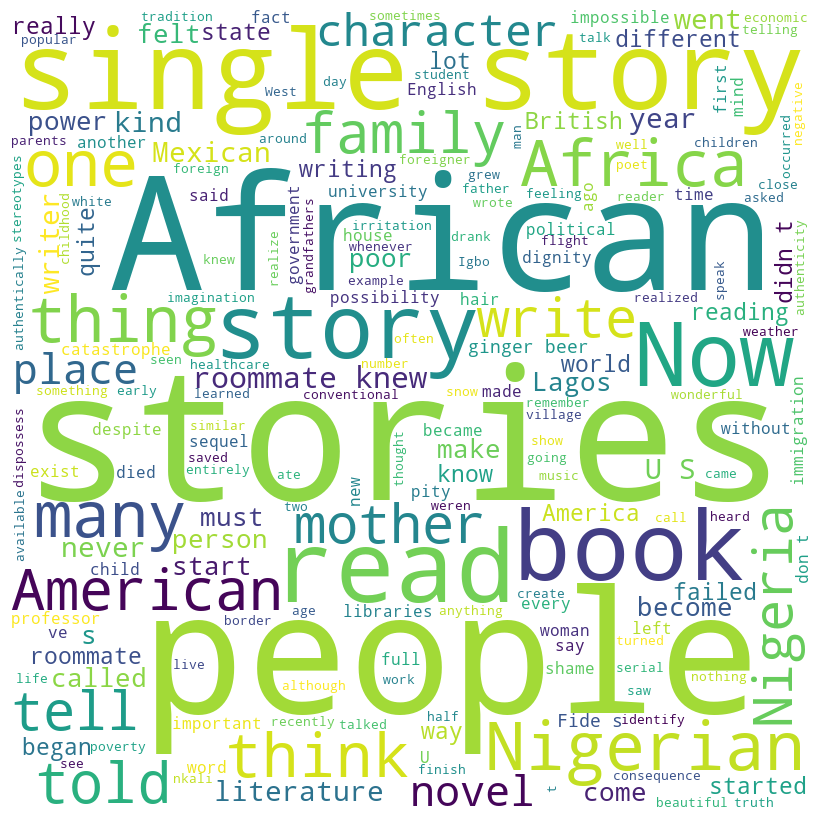

In [44]:
# Cremos una grafico de nubes para visualizar la frecuencia de las pabalabras del texto selecionado a primera vista

texto = Chimamanda_Ngozi

# Crear la nube de palabras
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(texto)

# Visualizar la nube de palabras
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

La nube de palabras generada a partir del discurso de Chimamanda Ngozi Adichie, "The Danger of a Single Story", revela la frecuencia de temas clave como la identidad, la cultura y la literatura. Palabras como "stories", "single", "book", "Nigerian", "Africa", y "people" destacan, indicando una discusión sobre las limitaciones de las narrativas únicas y su impacto en la percepción cultural y personal. Adichie comparte experiencias personales que ilustran cómo las historias unidimensionales pueden simplificar y estereotipar, subrayando la importancia de una diversidad de perspectivas en la literatura y en la comprensión de las personas. El discurso aborda críticamente cómo la literatura puede influir en nuestra comprensión del mundo y aboga por una representación más rica y matizada de África y su gente.

Este gráfico nos da una primera impresión de lo que se habla en el texto, no nos da detalles precisos sobre el contenido o el contexto en el que se usan las palabras, pero proporciona una impresión visual rápida de los temas y palabras clave del discurso.

#### Procesamiento del texto mediante tokenización

La tokenización es un paso fundamental en el procesamiento del lenguaje natural (NLP). Consiste en dividir un texto o una cadena de caracteres en unidades más pequeñas, llamadas "tokens". En el contexto del procesamiento de texto, estos tokens suelen ser palabras, pero también pueden ser frases, oraciones o incluso caracteres individuales.

In [36]:
# Cargar el modelo de spaCy para inglés
nlp = spacy.load('en_core_web_sm')

# Tokenizamos el texto
doc = nlp(Chimamanda_Ngozi)

# Crear la lista de tokens en minúsculas
tokens_lower = [token.text.lower() for token in doc if not token.is_punct and not token.is_space]

# Contar la frecuencia de cada token
word_freq = Counter(tokens_lower)

print(tokens_lower)

['i', '’m', 'a', 'storyteller', 'and', 'i', 'would', 'like', 'to', 'tell', 'you', 'a', 'few', 'personal', 'stories', 'about', 'what', 'i', 'like', 'to', 'call', 'the', 'danger', 'of', 'the', 'single', 'story', '”i', 'grew', 'up', 'on', 'a', 'university', 'campus', 'in', 'eastern', 'nigeria', 'my', 'mother', 'says', 'that', 'i', 'started', 'reading', 'at', 'the', 'age', 'of', 'two', 'although', 'i', 'think', 'four', 'is', 'probably', 'close', 'to', 'the', 'truth', 'so', 'i', 'was', 'an', 'early', 'reader', 'and', 'what', 'i', 'read', 'were', 'british', 'and', 'american', 'children', '’s', 'books', 'i', 'was', 'also', 'an', 'early', 'writer', 'and', 'when', 'i', 'began', 'to', 'write', 'at', 'about', 'the', 'age', 'of', 'seven', 'stories', 'in', 'pencil', 'with', 'crayon', 'illustrations', 'that', 'my', 'poor', 'mother', 'was', 'obligated', 'to', 'read', 'i', 'wrote', 'exactly', 'the', 'kinds', 'of', 'stories', 'i', 'was', 'reading', 'all', 'my', 'characters', 'were', 'white', 'and', 'bl

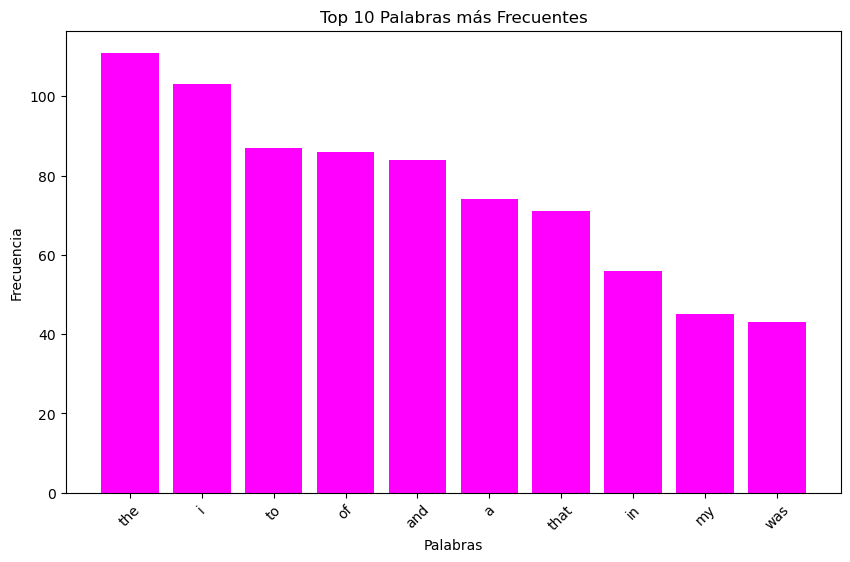

In [46]:

# Obtener las 10 palabras más frecuentes y las motramos en un gráfico de barras
common_words = word_freq.most_common(10)

# Desempaquetar las palabras y sus frecuencias en listas separadas
words, frequencies = zip(*common_words)

# Crear un gráfico de barras en color fucsia para las 10 palabras más frecuentes
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='fuchsia')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Top 10 Palabras más Frecuentes')
plt.xticks(rotation=45)
plt.show()



El gráfico de barras muestra el top 10 de palabras más frecuentes del texto. Se observa que las palabras comunes de conexión y artículos como  "the", "i", "to", "of", "and" etc. Son las más utilizadas en el discurso, lo cual es típico en el uso del lenguaje ya que estas palabras forman la estructura básica de la comunicación en inglés. Para obtener un análisis más detallado de los temas específicos del discurso, sería útil excluir estas palabras comunes y centrarse en los sustantivos, verbos y adjetivos más descriptivos.

#### Limpieza de las palabras más comunes: Stop words

Por medio de la propiedad  'is_stop' de spaCy vamos a filtrar las Stop words o palabras más comunes, para incluir solo los sutativos, verbos y adjetivos, basándose en la propiedad 'pos_' que representa la parte del discurso de cada token. Finalmente calcularemos la frecuencia de las palabras importantes  y las mostraremos por medio de una grafico de barras.

In [38]:
# Cargar el modelo de lenguaje de spaCy
nlp = spacy.load('en_core_web_sm')

# Procesar el texto con spaCy para obtener un objeto Doc
doc = nlp(Chimamanda_Ngozi)

# Filtrar stop words y seleccionar solo los sustantivos, verbos y adjetivos
filtered_tokens = [token.text for token in doc if token.pos_ in ['NOUN', 'VERB', 'ADJ'] and not token.is_stop]

# Ahora podemos contar la frecuencia de los tokens filtrados
filtered_word_freq = Counter(filtered_tokens)

print(filtered_tokens)

['storyteller', 'like', 'tell', 'personal', 'stories', 'like', 'danger', 'single', 'story', 'grew', 'university', 'campus', 'eastern', 'mother', 'says', 'started', 'reading', 'age', 'think', 'close', 'truth', 'early', 'reader', 'read', 'British', 'American', 'children', 'books', 'early', 'writer', 'began', 'write', 'age', 'stories', 'pencil', 'crayon', 'illustrations', 'poor', 'mother', 'obligated', 'read', 'wrote', 'kinds', 'stories', 'reading', 'characters', 'white', 'blue', 'played', 'snow', 'ate', 'apples', 'talked', 'lot', 'weather', 'lovely', 'sun', 'come', 'fact', 'lived', 'snow', 'ate', 'mangoes', 'talked', 'weather', 'need', 'characters', 'drank', 'lot', 'ginger', 'beer', 'characters', 'British', 'books', 'read', 'drank', 'ginger', 'beer', 'mind', 'idea', 'ginger', 'beer', 'years', 'desperate', 'desire', 'taste', 'ginger', 'beer', 'story', 'demonstrates', 'think', 'impressionable', 'vulnerable', 'face', 'story', 'children', 'read', 'books', 'characters', 'foreign', 'convinced'

In [39]:
#calculamos la frecuencia de las palabras
from collections import Counter
counts = Counter(filtered_tokens)
counts 

Counter({'storyteller': 1,
         'like': 4,
         'tell': 7,
         'personal': 1,
         'stories': 21,
         'danger': 1,
         'single': 17,
         'story': 28,
         'grew': 2,
         'university': 3,
         'campus': 1,
         'eastern': 1,
         'mother': 8,
         'says': 1,
         'started': 4,
         'reading': 4,
         'age': 2,
         'think': 9,
         'close': 1,
         'truth': 2,
         'early': 2,
         'reader': 1,
         'read': 14,
         'British': 3,
         'American': 6,
         'children': 2,
         'books': 9,
         'writer': 3,
         'began': 4,
         'write': 6,
         'pencil': 1,
         'crayon': 1,
         'illustrations': 1,
         'poor': 5,
         'obligated': 1,
         'wrote': 2,
         'kinds': 1,
         'characters': 6,
         'white': 2,
         'blue': 1,
         'played': 1,
         'snow': 2,
         'ate': 2,
         'apples': 1,
         'talked': 2,
     

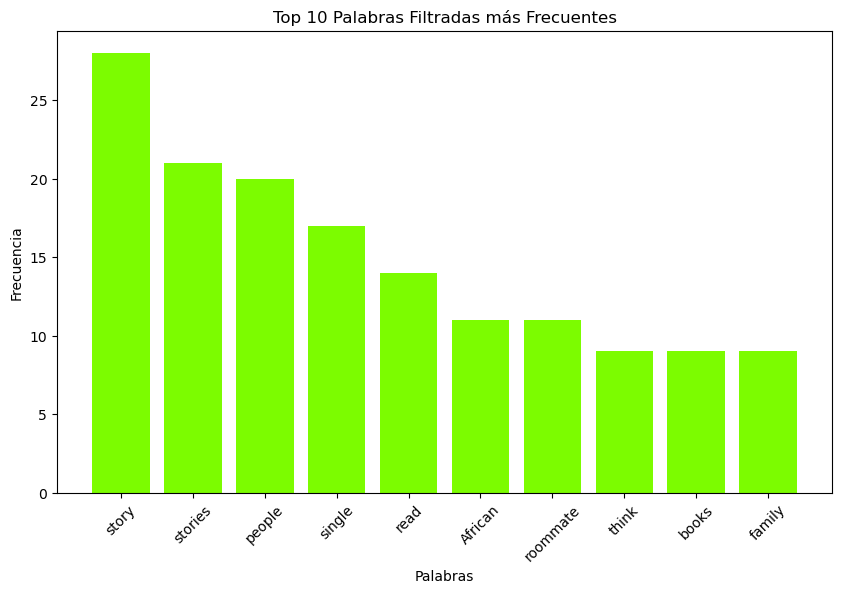

In [41]:
# Monstrams un top 10 palabras filtradas más frecuentes
filtered_common_words = filtered_word_freq.most_common(10)

# Desempaquetar para el gráfico de barras
words, frequencies = zip(*filtered_common_words)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='lawngreen')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Top 10 Palabras Filtradas más Frecuentes')
plt.xticks(rotation=45)
plt.show()



Este gráfico muestra las palabras clave después de haber eliminado las palabras comunes (stop words) y se enfoca en sustantivos, verbos y adjetivos descriptivos. Las palabras que aparecen son más sustanciales y proporcionan una mejor idea del contenido temático del discurso.
Palabras como "story", "stories", "people", y "single" indican que el discurso se centra en narrativas personales y colectivas, la importancia de múltiples historias y el concepto de "una sola historia".

### Ejercicio 2: Saca las stopwords y realiza stemming en tu conjunto de datos.

Dado a que anteriormente ya hemos hecho una limpieza de las stopwords, ahora nos centraremos en hacer una stemming en el conjunto de datos. 
El stemming es una técnica de procesamiento de lenguaje natural que se utiliza para reducir las palabras a su forma raíz o base, normalmente eliminando los sufijos. Esto es útil para consolidar diferentes formas de una palabra (como tiempos verbales o plurales) en una sola entidad para el análisis.

In [48]:
# Inicializar el Porter Stemmer
stemmer = PorterStemmer()

# Aplicar stemming a cada palabra
stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]

# Contar la frecuencia de cada raíz
stemmed_freq = Counter(stemmed_tokens)

print(stemmed_tokens)

['storytel', 'like', 'tell', 'person', 'stori', 'like', 'danger', 'singl', 'stori', 'grew', 'univers', 'campu', 'eastern', 'mother', 'say', 'start', 'read', 'age', 'think', 'close', 'truth', 'earli', 'reader', 'read', 'british', 'american', 'children', 'book', 'earli', 'writer', 'began', 'write', 'age', 'stori', 'pencil', 'crayon', 'illustr', 'poor', 'mother', 'oblig', 'read', 'wrote', 'kind', 'stori', 'read', 'charact', 'white', 'blue', 'play', 'snow', 'ate', 'appl', 'talk', 'lot', 'weather', 'love', 'sun', 'come', 'fact', 'live', 'snow', 'ate', 'mango', 'talk', 'weather', 'need', 'charact', 'drank', 'lot', 'ginger', 'beer', 'charact', 'british', 'book', 'read', 'drank', 'ginger', 'beer', 'mind', 'idea', 'ginger', 'beer', 'year', 'desper', 'desir', 'tast', 'ginger', 'beer', 'stori', 'demonstr', 'think', 'impression', 'vulner', 'face', 'stori', 'children', 'read', 'book', 'charact', 'foreign', 'convinc', 'book', 'natur', 'foreign', 'thing', 'identifi', 'thing', 'chang', 'discov', 'afri

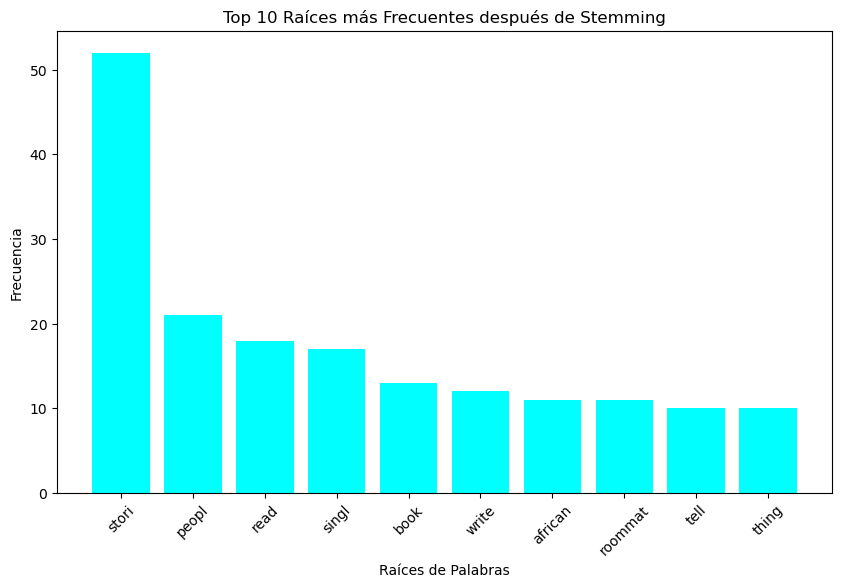

In [43]:

# Monstramos un top 10 de las raíces más frecuentes
stemmed_common = stemmed_freq.most_common(10)

# Desempaquetar para el gráfico de barras
stems, stem_frequencies = zip(*stemmed_common)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(stems, stem_frequencies, color='cyan')
plt.xlabel('Raíces de Palabras')
plt.ylabel('Frecuencia')
plt.title('Top 10 Raíces más Frecuentes después de Stemming')
plt.xticks(rotation=45)
plt.show()


El gráfico muestra que palabras como "story" y "people" (reducidas a "stori" y "peopl" después del stemming) son frecuentes, lo que destaca la importancia de las narrativas y las personas en su discurso. Esto refleja el mensaje de Adichie sobre la diversidad de historias humanas y cómo las narrativas únicas pueden dar lugar a interpretaciones incompletas o sesgadas de las personas y culturas.

El stemming se sentra en el núcleo semántico de las palabras y hace que la comparación de frecuencias sea más significativa, especialmente en un análisis cuantitativo del texto. Sin embargo, es importante tener en cuenta que el stemming puede a veces ser demasiado agresivo, combinando palabras con raíces diferentes o dejando raíces que no son palabras completas por sí mismas. Por eso, es una técnica más utilizada en la búsqueda y recuperación de información, donde la cobertura puede ser más importante que la precisión lingüística.

### Ejercicio 3: Realiza un análisis de sentimiento en tu conjunto de datos.

#### Análisis de sentimiento general

Primero relizaremos un análisis de sentimiento del texto en general. Este enfoque es especialmente bueno para el análisis de discursos, reseñas y otros textos en los que la intensidad del sentimiento es una dimensión significativa. El método 'polarity_scores' devuelve un diccionario con las puntuaciones de sentimiento para cuatro categorías: negativo, neutro, positivo y compuesto. La puntuación compuesta es una métrica que calcula la suma normalizada de todas las puntuaciones de léxico que se han normalizado entre -1 (más negativo) y +1 (más positivo).

In [33]:
# Creamos la instancia de SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

#Calculamos polaity scores
sentiment = sia.polarity_scores(Chimamanda_Ngozi)

# Imprimimos los resultados
print(sentiment)


{'neg': 0.096, 'neu': 0.798, 'pos': 0.106, 'compound': 0.959}


Basándonos en las puntuaciones proporcionadas:

* neg: 0.096 - Una pequeña parte del discurso tiene un tono negativo.

* neu: 0.798 - La mayor parte del discurso es neutral, lo que sugiere que la mayoría del contenido podría ser informativo o factual.

* pos: 0.106 - Una porción ligeramente mayor a la negativa del discurso es positiva.

* compound: 0.959 - La puntuación compuesta es muy alta y positiva, lo que indica que, en general, el discurso es visto como positivo por el analizador de sentimiento.

La alta puntuación compuesta sugiere que, a pesar de las variaciones en el sentimiento de las diferentes partes del texto, el mensaje general del discurso se percibe como positivo. Este resultado puede parecer sorprendente dado que las puntuaciones de neg y pos están bastante equilibradas y la mayor parte del discurso es neutral. Sin embargo, la métrica compound toma en cuenta no solo la presencia de palabras con sentimiento positivo y negativo, sino también su intensidad y su posición dentro del texto, lo que puede resultar en una puntuación compuesta alta cuando los elementos positivos son particularmente fuertes o enfatizados en el texto.

Esto podría indicar que los puntos clave que Chimamanda Ngozi Adichie quería transmitir en su discurso tienen un sentimiento positivo y probablemente fueron expresados con fuerza y claridad, dejando al oyente o lector con una impresión generalmente positiva.


#### Análisis de sentimiento por sentencias

El análisis de sentimiento por sentencias ofrece una visión detallada y matizada del sentimiento en un texto, contrastando con el análisis general a nivel de documento que provee una visión global del sentimiento. Este enfoque por sentencias es útil para identificar cambios en el sentimiento a lo largo del texto, permitiendo detectar variaciones entre tonos positivos, negativos y neutros. Además, mejora la precisión y el contexto al analizar el sentimiento asociado con cada idea o punto específico, lo cual es crucial en textos donde los matices y el contexto afectan significativamente la interpretación del sentimiento. Este método detallado es especialmente valioso para comprender la dinámica del sentimiento en discursos o textos con una rica variedad de expresiones emocionales.

In [35]:

# Inicializar el analizador de sentimiento de VADER
sia = SentimentIntensityAnalyzer()

# Dividir el texto en sentencias
sentences = tokenize.sent_tokenize(Chimamanda_Ngozi)

# Analizar el sentimiento de cada sentencia y obtener la puntuación compuesta
compound_scores = [sia.polarity_scores(sentence)['compound'] for sentence in sentences]

# Calcular la media de las puntuaciones compuestas
average_compound = np.mean(compound_scores)
print(f"Sentimiento promedio compuesto: {average_compound}")


Sentimiento promedio compuesto: 0.018481617647058832


Después de examinar los resultados del análisis de sentimiento del discurso de Chimamanda Ngozi Adichie, me ha quedado claro que, aunque la puntuación compuesta es ligeramente positiva, el tono general se mantiene equilibrado, sin inclinarse significativamente hacia lo positivo o lo negativo. Esta observación resalta la complejidad y la riqueza del discurso, sugiriendo que los aspectos más sutiles, como la ironía o las referencias culturales, pueden no ser plenamente capturados por un análisis puramente cuantitativo. Desde mi punto de vista, para apreciar verdaderamente la profundidad y el matiz del discurso de Adichie, sería beneficioso combinar este análisis numérico con una evaluación cualitativa, que tome en cuenta el contexto y los matices específicos del lenguaje que ella utiliza. La neutralidad general del tono sugiere que Adichie equilibra hábilmente aspectos positivos y negativos, posiblemente para enfatizar un mensaje más matizado y reflexivo.